In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Convert cathegorical values to numerical

In [2]:
train = pd.read_csv('data/train.csv')
train = train.drop(columns=['Unnamed: 0'])

test = pd.read_csv('data/train.csv')
test = test.drop(columns=['Unnamed: 0'])

In [3]:
df = pd.concat([test, train], ignore_index=True)

### NaN values

In [4]:
# Get the missing data counts
missing_data = df.isna().sum()

# Convert the missing_data Series to a DataFrame for formatting
missing_data_df = missing_data.reset_index()
missing_data_df.columns = ['Column', 'Missing Count']

# Print the missing data counts as a nicely formatted table
print(tabulate(missing_data_df, headers='keys', tablefmt='pretty'))

+----+-----------------------------------+---------------+
|    |              Column               | Missing Count |
+----+-----------------------------------+---------------+
| 0  |                id                 |       0       |
| 1  |              Gender               |       0       |
| 2  |           Customer Type           |       0       |
| 3  |                Age                |       0       |
| 4  |          Type of Travel           |       0       |
| 5  |               Class               |       0       |
| 6  |          Flight Distance          |       0       |
| 7  |       Inflight wifi service       |       0       |
| 8  | Departure/Arrival time convenient |       0       |
| 9  |      Ease of Online booking       |       0       |
| 10 |           Gate location           |       0       |
| 11 |          Food and drink           |       0       |
| 12 |          Online boarding          |       0       |
| 13 |           Seat comfort            |       0      

In [5]:
# Calculate the percentage of NaN values in each column
nan_percentage = (df.isna().mean() * 100).round(2)

# Convert the nan_percentage Series to a DataFrame for formatting
nan_percentage_df = nan_percentage.reset_index()
nan_percentage_df.columns = ['Column', 'NaN Percentage']

# Print the nan_percentage as a nicely formatted table
print(tabulate(nan_percentage_df, headers='keys', tablefmt='pretty'))

+----+-----------------------------------+----------------+
|    |              Column               | NaN Percentage |
+----+-----------------------------------+----------------+
| 0  |                id                 |      0.0       |
| 1  |              Gender               |      0.0       |
| 2  |           Customer Type           |      0.0       |
| 3  |                Age                |      0.0       |
| 4  |          Type of Travel           |      0.0       |
| 5  |               Class               |      0.0       |
| 6  |          Flight Distance          |      0.0       |
| 7  |       Inflight wifi service       |      0.0       |
| 8  | Departure/Arrival time convenient |      0.0       |
| 9  |      Ease of Online booking       |      0.0       |
| 10 |           Gate location           |      0.0       |
| 11 |          Food and drink           |      0.0       |
| 12 |          Online boarding          |      0.0       |
| 13 |           Seat comfort           

### Find unique values and types

In [6]:
# Get the number of unique values in each column
unique_counts = df.nunique()

# Convert the unique_counts Series to a DataFrame for formatting
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique Counts']

# Print the unique_counts as a nicely formatted table
print(tabulate(unique_counts_df, headers='keys', tablefmt='pretty'))

+----+-----------------------------------+---------------+
|    |              Column               | Unique Counts |
+----+-----------------------------------+---------------+
| 0  |                id                 |    103904     |
| 1  |              Gender               |       2       |
| 2  |           Customer Type           |       2       |
| 3  |                Age                |      75       |
| 4  |          Type of Travel           |       2       |
| 5  |               Class               |       3       |
| 6  |          Flight Distance          |     3802      |
| 7  |       Inflight wifi service       |       6       |
| 8  | Departure/Arrival time convenient |       6       |
| 9  |      Ease of Online booking       |       6       |
| 10 |           Gate location           |       6       |
| 11 |          Food and drink           |       6       |
| 12 |          Online boarding          |       6       |
| 13 |           Seat comfort            |       6      

In [7]:
# Get the data types of each column
column_types = df.dtypes.reset_index()
column_types.columns = ['Column', 'Data Type']

# Print the column data types as a nicely formatted table
print(tabulate(column_types, headers='keys', tablefmt='pretty'))

+----+-----------------------------------+-----------+
|    |              Column               | Data Type |
+----+-----------------------------------+-----------+
| 0  |                id                 |   int64   |
| 1  |              Gender               |  object   |
| 2  |           Customer Type           |  object   |
| 3  |                Age                |   int64   |
| 4  |          Type of Travel           |  object   |
| 5  |               Class               |  object   |
| 6  |          Flight Distance          |   int64   |
| 7  |       Inflight wifi service       |   int64   |
| 8  | Departure/Arrival time convenient |   int64   |
| 9  |      Ease of Online booking       |   int64   |
| 10 |           Gate location           |   int64   |
| 11 |          Food and drink           |   int64   |
| 12 |          Online boarding          |   int64   |
| 13 |           Seat comfort            |   int64   |
| 14 |      Inflight entertainment       |   int64   |
| 15 |    

### Convert cathegorical values to numerical

In [8]:
numerical_data = df.copy()

numerical_data['Gender'] = numerical_data['Gender'].map({'Male': 0, 'Female': 1})
numerical_data['Customer Type'] = numerical_data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
numerical_data['Type of Travel'] = numerical_data['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
numerical_data['Class'] = numerical_data['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})

### Histograms for every variable

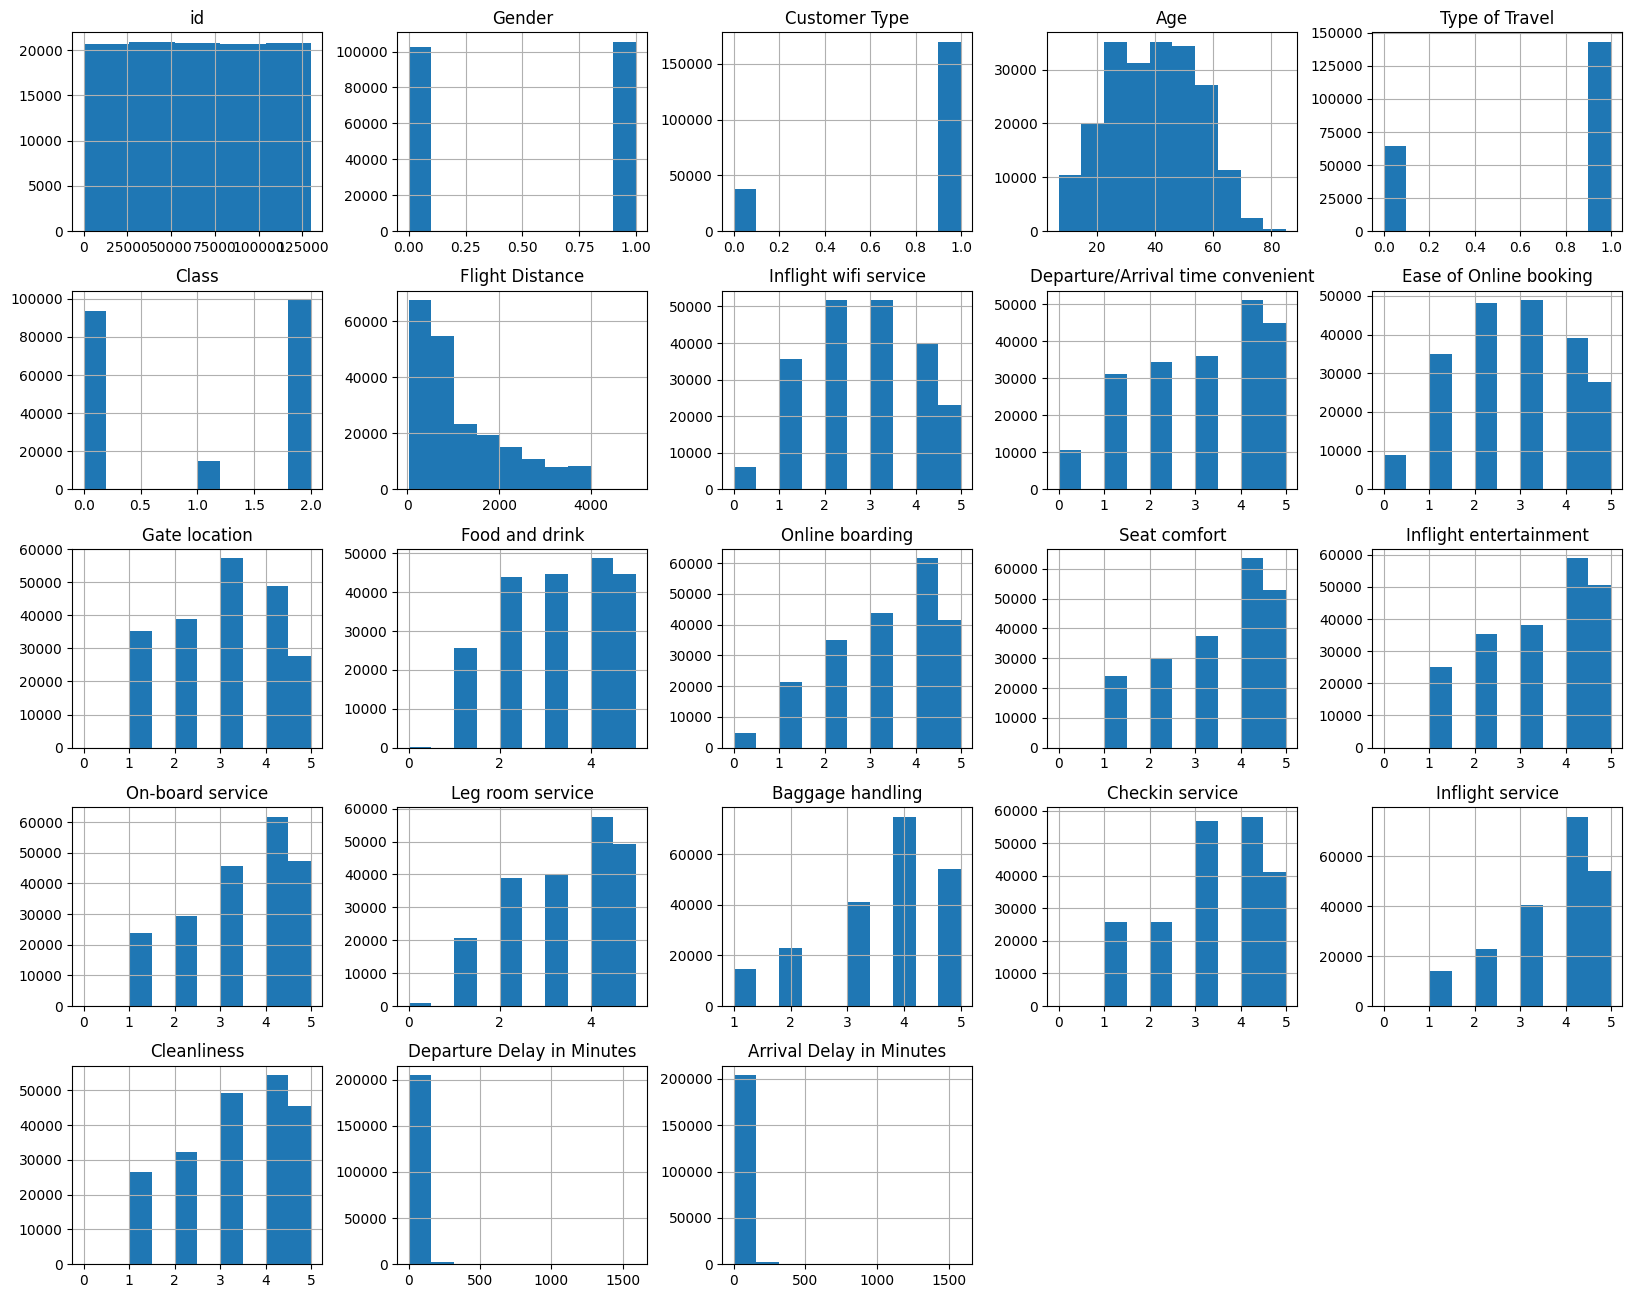

In [9]:
# Create histograms for each numeric column
numerical_data.hist(figsize=(20, 16))
plt.show()

### Correlation between variables

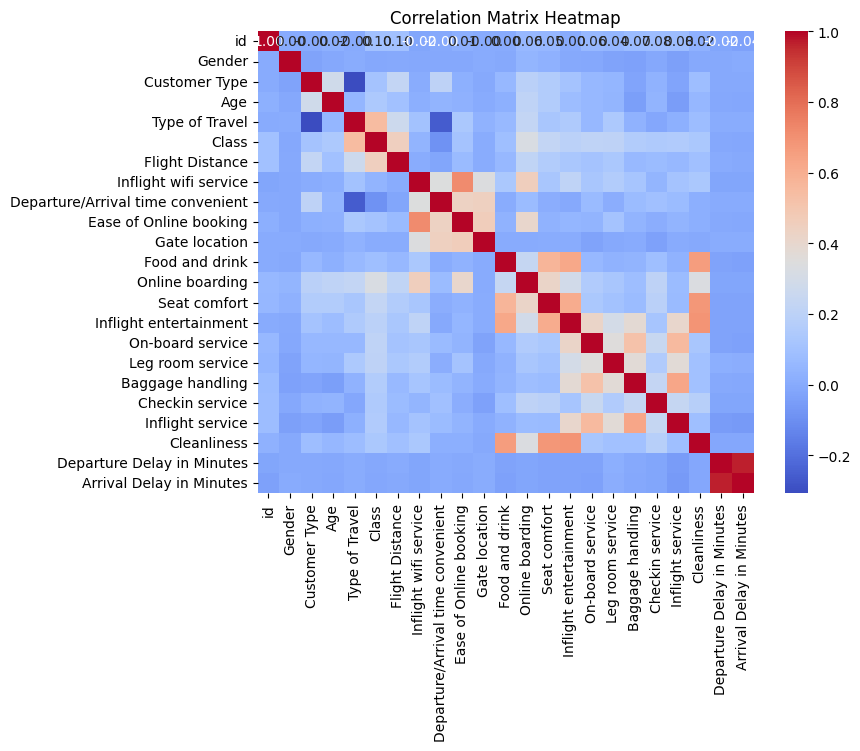

In [10]:
# Exclude non-numeric columns from the DataFrame
numeric_df = numerical_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Statistics

In [11]:
# Generate descriptive statistics
statistics = df.describe()

# Print the statistics as a nicely formatted table
print(tabulate(statistics, headers='keys', tablefmt='pretty'))

+-------+--------------------+--------------------+--------------------+-----------------------+-----------------------------------+------------------------+--------------------+--------------------+-------------------+--------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------------+--------------------------+
|       |         id         |        Age         |  Flight Distance   | Inflight wifi service | Departure/Arrival time convenient | Ease of Online booking |   Gate location    |   Food and drink   |  Online boarding  |    Seat comfort    | Inflight entertainment |  On-board service  |  Leg room service  |  Baggage handling  |  Checkin service   |  Inflight service  |    Cleanliness     | Departure Delay in Minutes | Arrival Delay in Minutes |
+-------+--------------------+--------------------+--------------------+-----------------------+--------